<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FPD%EF%BC%88%E3%83%87%E3%83%95%E3%82%A9%E3%83%AB%E3%83%88%E3%81%AE%E7%A2%BA%E7%8E%87%EF%BC%89%E3%81%AE%E7%AE%97%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

In [37]:
print(df)

     Default          CI    GDP  Interest_rate  Unemployment_rate_measured
0   0.033419  104.225000  0.386       0.327464                         5.4
1   0.015027  103.208333  0.042       0.092707                         5.3
2   0.008547  108.425000  1.535       0.023512                         4.7
3   0.008119  116.500000  2.186       0.021241                         4.4
4   0.006452  118.825000  1.804       0.023886                         4.1
5   0.010000  123.625000  1.372       0.032943                         3.9
6   0.006297  124.658333  1.484       0.422230                         4.0
7   0.016949  116.158333 -1.224       0.689082                         5.1
8   0.019531   90.525000 -5.693       0.646063                         5.1
9   0.002096  106.950000  4.098       0.222313                         4.6
10  0.007194  108.108333  0.024       0.128445                         4.3
11  0.003850  110.608333  1.375       0.135735                         4.0
12  0.002841  114.441667 

In [38]:
#データ数を20倍にする
import pandas as pd
import numpy as np

# データの読み込み
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

# データ拡張
augmented_data = pd.concat([df.copy() + np.random.normal(0, 0.01, size=(df.shape[0], df.shape[1])) for _ in range(19)], ignore_index=True)

# 各列に対してランダムなノイズを追加
for column in df.columns:
    if df[column].dtype == 'object':
        augmented_data[column] = augmented_data[column].astype(float)  # floatに変換
    augmented_data[column] += np.random.normal(0, 0.00001, size=augmented_data.shape[0])

# 拡張後のデータの確認
print(augmented_data.head())


    Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0  0.014156  104.215286  0.382360       0.334924                    5.402240
1  0.015381  103.203845  0.041413       0.088873                    5.304540
2 -0.003187  108.429923  1.547093       0.001483                    4.711845
3 -0.013507  116.499282  2.197919       0.021313                    4.400243
4  0.002650  118.839974  1.804395       0.021720                    4.114691


In [39]:
print(augmented_data.head(100))

     Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0   0.014156  104.215286  0.382360       0.334924                    5.402240
1   0.015381  103.203845  0.041413       0.088873                    5.304540
2  -0.003187  108.429923  1.547093       0.001483                    4.711845
3  -0.013507  116.499282  2.197919       0.021313                    4.400243
4   0.002650  118.839974  1.804395       0.021720                    4.114691
..       ...         ...       ...            ...                         ...
95 -0.002841  117.068987  0.742459      -0.013401                    2.796304
96  0.019102  121.667480  1.660059      -0.221752                    2.406907
97  0.004206  122.256257  0.661076      -0.188108                    2.391525
98  0.008299  116.971988 -0.390641      -0.127105                    2.812277
99  0.025099   99.999902 -4.258311      -0.207362                    2.792979

[100 rows x 5 columns]


In [40]:
#必要なモジュールのインストール
!pip install LightGBM
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = augmented_data
print(df)

      Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0    0.014156  104.215286  0.382360       0.334924                    5.402240
1    0.015381  103.203845  0.041413       0.088873                    5.304540
2   -0.003187  108.429923  1.547093       0.001483                    4.711845
3   -0.013507  116.499282  2.197919       0.021313                    4.400243
4    0.002650  118.839974  1.804395       0.021720                    4.114691
..        ...         ...       ...            ...                         ...
375 -0.012549  117.061498  0.759725      -0.008286                    2.795056
376  0.002236  121.679072  1.659401      -0.242119                    2.396913
377 -0.000070  122.248517  0.642664      -0.199007                    2.399554
378 -0.006152  116.975857 -0.387273      -0.118567                    2.793969
379  0.003645   99.968268 -4.294750      -0.179965                    2.814713

[380 rows x 5 columns]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 4
[LightGBM] [Info] Start training from score 0.008971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

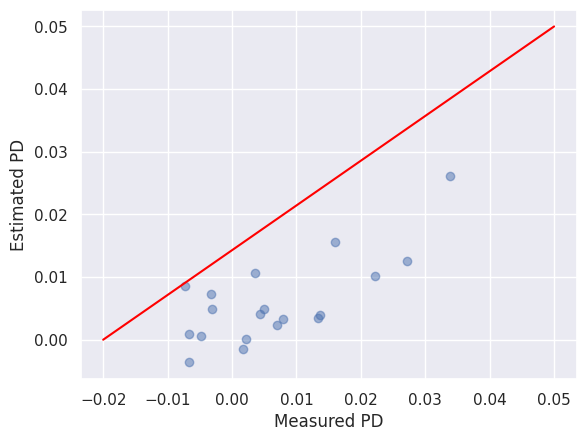

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

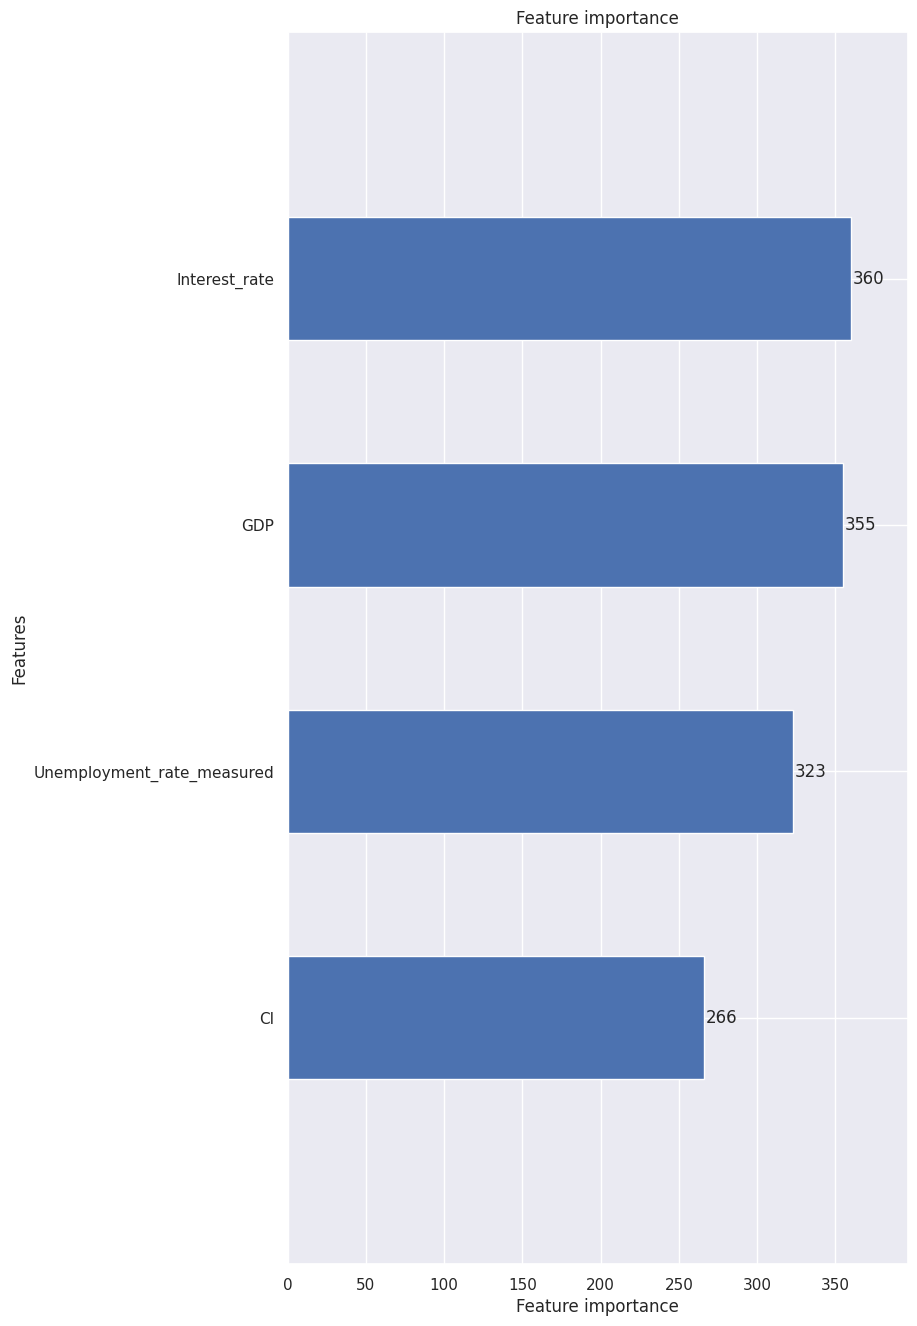

In [42]:
#予測ターゲットの格納（Default：A列）
target_df = df[["Default"]]
#特徴量の格納（説明変数：B列以降）
train_df = df.iloc[:,1:5]

#モデル学習のための、訓練データとテストデータを19:1で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.05)

#lightで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

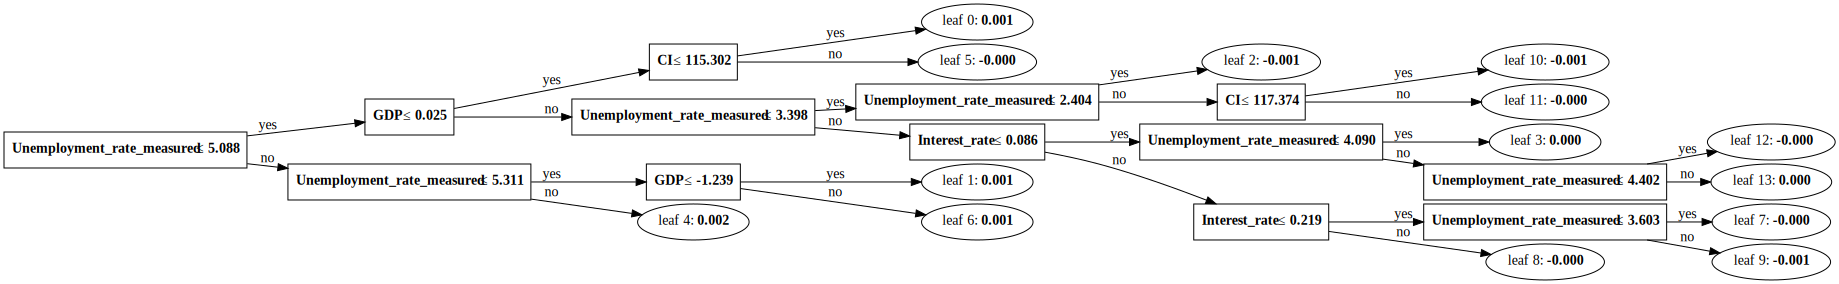

In [43]:
# 決定木の分岐の可視化
lgb.create_tree_digraph(model, 1)

In [44]:
#適当なデータを入れて予測（model.predict([[?,?,?,?,?,?,?,?,?,?,?,?]])）
pred_2024 = model.predict([[113.916666666667,1.302,-0.0990901639344262,1.73043187690688]])
print(pred_2024)




[0.00369365]


In [45]:
#結果
#[0.00740295]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

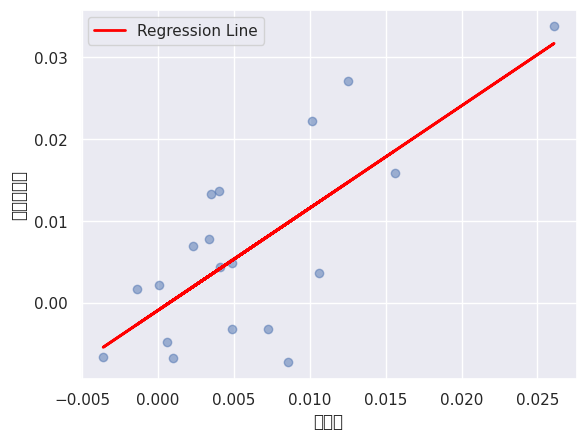

傾き: 1.2491148342579899
切片: -0.0008754559148726609


In [46]:
#これなしでは回る
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pred_Regression = pred

# 実際の価格と予測値の対応する点
x = np.array(pred_Regression).reshape(-1, 1)
y = np.array(y_test).reshape(-1, 1)


# 線形回帰モデルの作成
model2 = LinearRegression()

# モデルの学習
model2.fit(x, y)

# 傾きと切片の取得
slope = model2.coef_[0][0]
intercept = model2.intercept_[0]

# 予測値を使って回帰直線を描写
plt.scatter(x, y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label='Regression Line')
plt.xlabel('予測値')
plt.ylabel('実際の価格')
plt.legend()
plt.show()

print(f"傾き: {slope}")
print(f"切片: {intercept}")


In [47]:
#アドオン  調整中
pred_2024_2 = pred_2024-intercept
pred_2024_3 = pred_2024_2/slope
pred_2024_new = pred_2024_3
print(pred_2024_new)


pred_2 = pred-intercept
pred_3 = pred_2/slope
pred_new = pred_3
print(pred)
#アドオン前の2024年のPD　0.00740295


[0.00365787]
[ 1.56055333e-02 -3.62612239e-03  7.24250705e-03  3.51297216e-03
 -1.42016717e-03  1.25431687e-02  4.88735479e-03  2.31275795e-03
  2.60947384e-02  4.94615416e-05  3.36367515e-03  4.05457499e-03
  4.85746784e-03  4.01711842e-03  9.62820772e-04  8.52533186e-03
  1.01351538e-02  5.57785989e-04  1.06072599e-02]


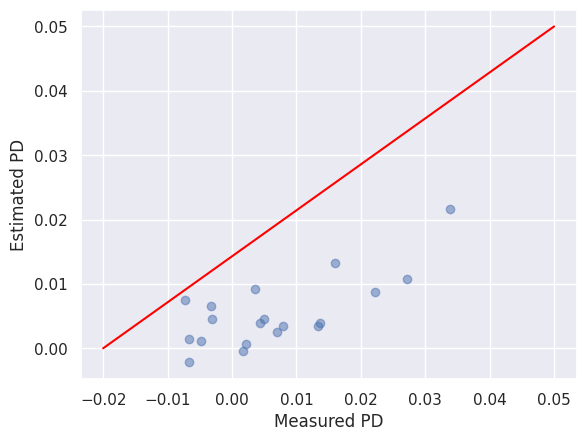

In [48]:
#散布図で予測の精度を描写　調整完了後確認
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred_new, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()

